In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
options(stringsAsFactors = F)
library(CellTrek)
library(tidyverse)
library(Seurat)
library(viridis)
library(ConsensusClusterPlus)

Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘MASS::select’ by ‘dplyr::select’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘dplyr::as_data_frame’ by ‘igraph::as_data_frame’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘dplyr::groups’ by ‘igraph::groups’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘dplyr::union’ by ‘igraph::union’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘igraph::groups’ by ‘plotly::groups’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘magrittr::set_names’ by ‘purrr::set_names’ when loading ‘CellTrek’”
Warning message:
“replacing 

In [3]:
# Cannot be loaded
# library(SeuratDisk)
# library(patchwork)
# Convert("/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.combined.clustered.h5ad", "h5seurat", overwrite=True, assay="RNA")
# scRNA <- LoadH5Seurat("/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.combined.clustered.h5seurat", assays="RNA")
# scRNA

In [3]:
library(anndata)


Attaching package: ‘anndata’


The following object is masked from ‘package:SeuratObject’:

    Layers


The following object is masked from ‘package:readr’:

    read_csv




In [74]:
c_data <- result@meta.data %>% select(c('perturb', 'perturb_gene', 'type', 'coord_x', 'coord_y'))
write.table(c_data, sep = '\t', file = '/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.map.A.csv',quote = FALSE)

In [ ]:
No_1345_1	No_1345	part_1	The original article contains 7 subDatasets, which are different by cells. This subDataset is based on whole cells.	A single-cell and spatially resolved atlas of human breast cancers	GSE176078	Nature genetics	2021-09-01	34493872	100064	9606	['breast']	TRUE	TRUE	TRUE	Cancer Epithelial, T cells, PVL (perivascular-like cells), Normal Epithelial, Endothelial, Myeloid, B cells, Plasmablasts, CAFs (cancer-associated fibroblasts)	['']	UMI	high quality	FALSE	https://www.ebi.ac.uk/ena/browser/view/PRJNA734812	27.605			


In [4]:
convert_human_to_mouse <- function(gene_list) {
    output = c()
    mouse_human_genes = read.csv("https://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt",sep="\t")

    for(gene in gene_list) {
          class_key = (mouse_human_genes %>% filter(Symbol == gene & Common.Organism.Name == "human"))[['DB.Class.Key']]
          if( !identical(class_key, integer(0)) ) {
            human_genes = (mouse_human_genes %>% filter(DB.Class.Key == class_key & Common.Organism.Name=="mouse, laboratory"))[,"Symbol"]
            for(human_gene in human_genes) {
                output = c(human_gene, output)
            }
          }
     }
     return (output)
}

In [5]:
t_genes <- readLines('/home/wpy/stereoseq/20240702-Exclusive/t_genes.txt')
head(t_genes)

mt_genes <- convert_human_to_mouse(t_genes)
head(mt_genes)

[1] "GZMA" "GZMK" "GZMH" "CD8A" "CD3D" "CD7"

Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse,
  laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse,
  laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse,
  laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object length is not a multiple of shorter object length”
Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `DB.Class.Key == class_key & Common.Organism.Name == "mouse,
  laboratory"`.
Caused by warning in `DB.Class.Key == class_key`:
! longer object len

[1] "Yes1"    "Vamp5"   "Utrn"    "Tspan14" "Trbv3"   "Trbv15"

In [6]:
data <- read_h5ad("/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.combined.dedup.h5")
data <- CreateSeuratObject(counts=t(data$X), meta.data=data$obs)
print(str(data))

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:14525406] 2 4 24 28 33 45 58 59 64 65 ...
  .. .. .. .. .. ..@ p       : int [1:10274] 0 1070 2566 3783 5018 6494 8384 9568 10621 11819 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 12485 10273
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:12485] "Xkr4" "Sox17" "Lypla1" "Rgs20" ...
  .. .. .. .. .. .. ..$ : chr [1:10273] "AAACCTGAGAGACGAA-1" "AAACCTGAGCTTATCG-1" "AAACCTGAGTACTTGC-1" "AAACCTGAGTATCGAA-1" ...
  .. .. .. .. .. ..@ x       : num [1:14525406] 0.815 0.815 0.815 0.815 0.815 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:14525406] 2 4 24 28 33 45 58 59 6

In [7]:
cdata <- data

In [8]:
cdata <- FindVariableFeatures(cdata)

In [9]:
unique(cdata@meta.data$perturb_gene)

[1] sgBatf          sgElob          sgBhlhe40       sgBcl2l11      
 [5] Duplicate       sgHopx          sgCxcr1         sgFoxp1        
 [9] sgCcr4          sgGpr35         sgNon-targeting sgTgif1        
[13] sgDdit4         sgCcr7          sgCcr1          sgKlf2         
[17] sgCcr10         sgBcl2          sgJund          sgCcr5         
[21] sgCcr2          sgCxcr5         sgAckr3         sgCd74         
[25] sgCxcr2         sgJun           sgTox           sgCcr6         
[29] sgCxcr6         sgCxcr4         sgFos           sgTcf7         
[33] sgYbx1          sgCxcr3        
34 Levels: Duplicate sgAckr3 sgBatf sgBcl2 sgBcl2l11 sgBhlhe40 ... sgYbx1

In [22]:
cdata$group <- cdata@meta.data$perturb_gene
Idents(cdata) <- 'group'

In [48]:
single_data <- subset(cdata, subset = perturb_gene != 'Duplicate')
markers <- FindAllMarkers(single_data, logfc.threshold = 0.1, min.pct = 0.1, test.use = 't', only.pos = TRUE, verbose = TRUE)
(markers)

Calculating cluster sgAckr3

Calculating cluster sgBatf

Calculating cluster sgBcl2

Calculating cluster sgBcl2l11

Calculating cluster sgBhlhe40

Calculating cluster sgCcr1

Calculating cluster sgCcr2

Calculating cluster sgCcr4

Calculating cluster sgCcr5

Calculating cluster sgCcr6

Calculating cluster sgCcr7

Calculating cluster sgCcr10

Calculating cluster sgCd74

Calculating cluster sgCxcr1

Calculating cluster sgCxcr2

Calculating cluster sgCxcr3

Calculating cluster sgCxcr4

Calculating cluster sgCxcr5

Calculating cluster sgCxcr6

Calculating cluster sgDdit4

Calculating cluster sgElob

Calculating cluster sgFos

Calculating cluster sgFoxp1

Calculating cluster sgGpr35

Calculating cluster sgHopx

Calculating cluster sgJun

Calculating cluster sgJund

Calculating cluster sgKlf2

Calculating cluster sgNon-targeting

Calculating cluster sgTcf7

Calculating cluster sgTgif1

Calculating cluster sgTox

Calculating cluster sgYbx1



p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene    
Trdc     4.384404e-11 0.2929880  0.773 0.624 5.473928e-07 sgBatf  Trdc    
Ly6c2    2.128893e-10 0.1464940  0.976 0.953 2.657924e-06 sgBatf  Ly6c2   
Gzma     1.649865e-09 0.4103910  0.654 0.429 2.059857e-05 sgBatf  Gzma    
Zfp36l2  2.309958e-09 0.2223948  0.886 0.817 2.883982e-05 sgBatf  Zfp36l2 
Itm2b    5.197733e-09 0.1041456  0.995 0.977 6.489370e-05 sgBatf  Itm2b   
Ccl5     2.396615e-08 0.1482182  0.976 0.963 2.992174e-04 sgBatf  Ccl5    
Hcst     3.491410e-08 0.1277032  0.976 0.945 4.359026e-04 sgBatf  Hcst    
Hopx     1.158292e-07 0.1668305  0.900 0.822 1.446127e-03 sgBatf  Hopx    
Gpr183   1.652416e-07 0.2455497  0.569 0.401 2.063042e-03 sgBatf  Gpr183  
Anxa1    1.937298e-07 0.2291348  0.687 0.545 2.418716e-03 sgBatf  Anxa1   
Zcchc11  6.345912e-07 0.1744353  0.777 0.680 7.922871e-03 sgBatf  Zcchc11 
Itgb7    2.283421e-06 0.1985872  0.597 0.448 2.850852e-02 sgBatf  Itgb7   
Vim      4.322327e-06 0.1496883  0.919 0.902 5.396425e-02 sgBatf  Vim     
Fgl2     4.804940e-06 0.1908574  0.678 0.580 5.998967e-02 sgBatf  Fgl2    
Ifitm3   5.890700e-06 0.2523796  0.431 0.244 7.354539e-02 sgBatf  Ifitm3  
Ifngr1   1.009527e-05 0.1249639  0.938 0.896 1.260394e-01 sgBatf  Ifngr1  
Il7r     1.329555e-05 0.2208724  0.536 0.422 1.659949e-01 sgBatf  Il7r    
Tsc22d3  1.545030e-05 0.1707612  0.796 0.734 1.928970e-01 sgBatf  Tsc22d3 
Cxcr3    1.606643e-05 0.1878189  0.559 0.417 2.005894e-01 sgBatf  Cxcr3   
Slfn1    1.671872e-05 0.1812204  0.540 0.428 2.087332e-01 sgBatf  Slfn1   
Klhl6    2.294438e-05 0.1674376  0.389 0.242 2.864606e-01 sgBatf  Klhl6   
Emb      2.714394e-05 0.1825983  0.569 0.426 3.388921e-01 sgBatf  Emb     
Pde4b    3.503597e-05 0.1598122  0.616 0.512 4.374241e-01 sgBatf  Pde4b   
Grap     4.217814e-05 0.1458184  0.773 0.715 5.265940e-01 sgBatf  Grap    
Tespa1   6.621617e-05 0.1529780  0.408 0.279 8.267089e-01 sgBatf  Tespa1  
Gzmk     7.978414e-05 0.1887188  0.607 0.517 9.961050e-01 sgBatf  Gzmk    
Prdx6    1.002093e-04 0.1344931  0.815 0.781 1.000000e+00 sgBatf  Prdx6   
Pde7a    1.841505e-04 0.1409396  0.725 0.671 1.000000e+00 sgBatf  Pde7a   
Crip1    2.452441e-04 0.1076198  0.962 0.956 1.000000e+00 sgBatf  Crip1   
Skap1    2.736978e-04 0.1140771  0.882 0.885 1.000000e+00 sgBatf  Skap1   
⋮        ⋮            ⋮          ⋮     ⋮     ⋮            ⋮       ⋮       
Itgb31   6.086678e-03 0.1417474  0.495 0.330 1.00000000   sgTgif1 Itgb3   
BC031181 6.934248e-03 0.1358164  0.667 0.563 1.00000000   sgTgif1 BC031181
Creld2   8.291365e-03 0.1133302  0.394 0.261 1.00000000   sgTgif1 Creld2  
Ndfip2   1.206289e-04 0.1520182  0.780 0.685 1.00000000   sgTox   Ndfip2  
Smg1     1.139417e-03 0.1317535  0.560 0.437 1.00000000   sgTox   Smg1    
Cst71    3.461151e-03 0.1056920  0.894 0.856 1.00000000   sgTox   Cst7    
Nfatc1   5.824417e-03 0.1405938  0.546 0.475 1.00000000   sgTox   Nfatc1  
Rbpj     9.837387e-03 0.1131495  0.709 0.641 1.00000000   sgTox   Rbpj    
Crip11   5.800660e-06 0.1735838  0.972 0.956 0.07242124   sgYbx1  Crip1   
Snrpg    2.223196e-05 0.1598684  0.917 0.819 0.27756608   sgYbx1  Snrpg   
Nfkbil1  1.285858e-04 0.1964356  0.370 0.206 1.00000000   sgYbx1  Nfkbil1 
Ly6a1    6.751020e-04 0.1196838  0.981 0.940 1.00000000   sgYbx1  Ly6a    
Hmgb22   7.641272e-04 0.1763654  0.880 0.830 1.00000000   sgYbx1  Hmgb2   
Rhog     1.144190e-03 0.1456122  0.824 0.763 1.00000000   sgYbx1  Rhog    
Sox13    1.257360e-03 0.1450110  0.102 0.003 1.00000000   sgYbx1  Sox13   
Batf3    1.990658e-03 0.1789697  0.148 0.045 1.00000000   sgYbx1  Batf3   
Tmem243  2.582236e-03 0.1484717  0.472 0.334 1.00000000   sgYbx1  Tmem243 
Lmna     4.308676e-03 0.1803146  0.343 0.219 1.00000000   sgYbx1  Lmna    
Lsm8     4.749253e-03 0.1381467  0.657 0.579 1.00000000   sgYbx1  Lsm8    
Tsc22d31 5.138354e-03 0.1479148  0.833 0.734 1.00000000   sgYbx1  Tsc22d3 
Tex10    5.193363e-03 0.1269458  0.259 0.157 1.00000000   sgYbx1  Tex10   
Rab27b   5.212070e-03 0.1243434  0

In [50]:
# perturb_genes <- unique(cdata@meta.data$perturb_gene)
# degs <- c()
# for (gene in perturb_genes) {
#     if (gene != 'sgNon-targeting' && gene != 'Duplicate')
    
#     markers <- FindMarkers(cdata, ident.1=gene, ident.2='sgNon-targeting', test.use='t')
#     high_genes <- rownames(markers %>% filter(.$p_val_adj < 1e-2) %>% filter(.$avg_log2FC > 0))
#     print(high_genes)
#     degs <- c(degs, high_genes)
# }
# print(degs)

degs <- rownames(markers %>% filter(.$p_val_adj < 5e-2))
degs

[1] "Trdc"       "Ly6c2"      "Gzma"       "Zfp36l2"    "Itm2b"     
 [6] "Ccl5"       "Hcst"       "Hopx"       "Gpr183"     "Anxa1"     
[11] "Zcchc11"    "Itgb7"      "Bcl2l11"    "Cd8a"       "Btg1"      
[16] "Rabgap1l"   "Il10ra"     "Tigit"      "Tox"        "Mxd4"      
[21] "Samsn1"     "St6galnac3" "Gzmb"       "Cd5"        "Ltb"       
[26] "Zfp361"     "Fam241a"    "Gzma1"      "Ikzf31"     "Cd6"       
[31] "Cxcr31"     "Apobec3"    "Serpina3g1" "Tesc1"      "Plac81"    
[36] "Anxa11"     "Ifi27l2a2"  "Atp6v0e"    "Tpi11"      "Aldoa"     
[41] "Pgk1"       "Gapdh"      "Bnip3"      "Pkm"        "Ero1l"     
[46] "Cdkn1a"     "Slc2a3"     "Galk1"      "Ndrg1"      "Slc16a3"   
[51] "Mif"        "Il1r2"      "Eif4ebp1"   "Slc2a1"     "Pfkl"      
[56] "H2-Ab1"     "Prelid2"    "Fam162a"    "Eno1"       "Tnfrsf18"  
[61] "Tnfrsf9"    "Atp5b"      "Snrpa"      "Ybx1"       "Fubp1"

In [103]:
cv_genes <- mt_genes[mt_genes %in% rownames(cdata)]
# t_high_data <- subset(cdata, features = intersect(VariableFeatures(cdata), cv_genes))
t_high_data <- subset(cdata, features = cv_genes)

Loading required package: grid



Loading required package: futile.logger



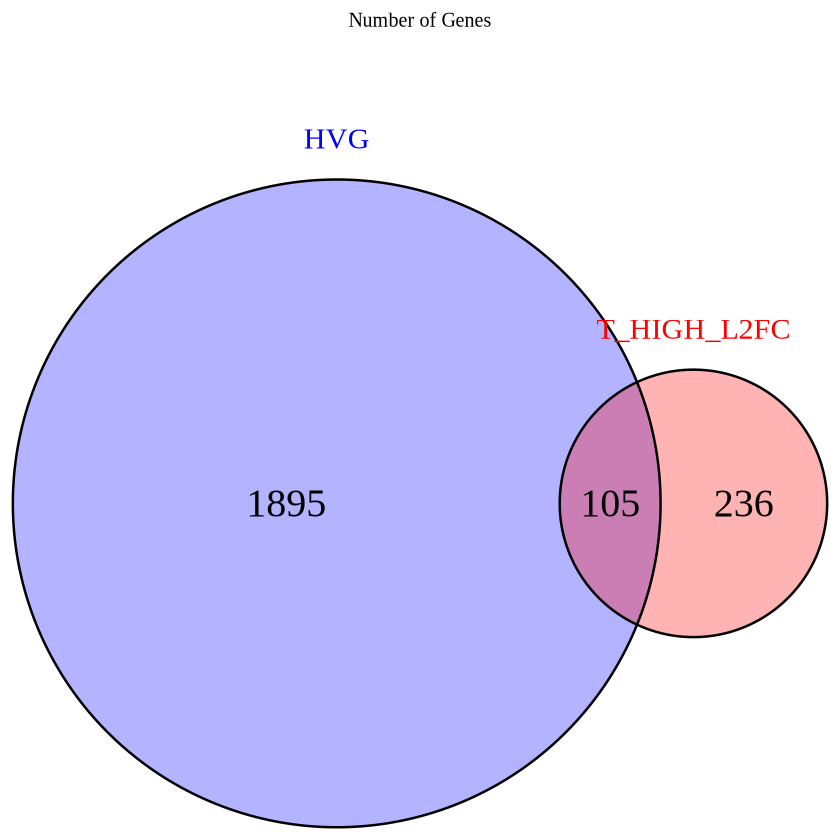

In [54]:
library(VennDiagram)

# 绘制维恩图
venn.plot <- venn.diagram(
  x = list(HVG = VariableFeatures(cdata), T_HIGH_L2FC = cv_genes),
  filename = NULL,
  fill = c("blue", "red"),
  alpha = 0.3,
  cat.col = c("blue", "red"),
  cat.cex = 1.5,
  cat.pos = 0,
  cex = 2,
  lwd = 2,
  main = "Number of Genes"
)
grid.draw(venn.plot)

In [104]:
t_high_data <- NormalizeData(t_high_data)
t_high_data <- ScaleData(t_high_data)

Centering and scaling data matrix



In [105]:
#t_high_data <- RunPCA(t_high_data, features=VariableFeatures(t_high_data))
t_high_data <- RunPCA(t_high_data)

PC_ 1 
Positive:  Cd63, Vcam1, Aqp3, Myadm, Ifitm2, Areg, Ifitm1, Col6a2, Anxa1, Rhoc 
	   Pmepa1, Csf1, Fcgr4, Itgb7, Klf2, Bst2, Cd300a, S100a6, Lrig1, Tnfsf9 
	   H2-Aa, H2-Ab1, Emb, Adrb2, Itga1, Sirpb1a, S1pr1, Cxcl13, Fcer1g, Pag1 
Negative:  Nkg7, Cd52, Ltb, Hcst, Klrd1, Cd8a, Cd8b1, Klrc1, Pdcd1, Lag3 
	   Tnfrsf18, Il21r, Prkch, Itgb1, Tnfrsf9, Cxcr6, Ctla4, Prf1, Cd160, Tox 
	   Havcr2, Ccr7, Rgs2, Eomes, Rgs1, Tnfrsf4, Tnfsf4, Itga4, Il2ra, Il12rb2 
PC_ 2 
Positive:  Cxcr3, Gzmk, Gzma, Hcst, Ifngr1, Cd52, Itgb7, S1pr1, Nkg7, Itgb1 
	   Gpr183, Ccr2, Rgs1, Pag1, Cxcr6, Ltb, Klrd1, Cd226, Il7r, Emb 
	   Anxa1, S100a6, Itga1, Klf2, Klrc1, Cxcr4, Cd69, Klrg1, Cd40lg, Ctla4 
Negative:  Tnfrsf4, Tnfrsf9, Ccr7, Cd70, Cd8a, Cd74, Tnfsf4, Lag3, Il21r, Crtam 
	   Il1r2, Cd63, Eomes, Tnfsf9, Vcam1, Il2ra, H2-Ab1, Rhoc, Cd160, Tox 
	   Prf1, Pdcd1, H2-Aa, Tnfrsf18, Gpm6b, Areg, Havcr2, Mpp7, Gzme, Cd8b1 
PC_ 3 
Positive:  Tox, Gzme, Itga4, Pdcd1, Havcr2, Prkch, Ifngr1, Prf1, Lag3, Fcer1

In [106]:
t_high_data <- RunUMAP(t_high_data, reduction='pca', dims=1:20)

13:22:44 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:22:44 Read 10273 rows and found 20 numeric columns

13:22:44 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

13:22:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|



*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:22:45 Writing NN index file to temp file /tmp/RtmpaZfWUN/file114f2158d5674

13:22:45 Searching Annoy index using 1 thread, search_k = 3000

13:22:48 Annoy recall = 100%

13:22:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:22:50 Initializing from normalized Laplacian + noise (using irlba)

13:22:51 Commencing optimization for 200 epochs, with 425836 positive edges

13:23:04 Optimization finished



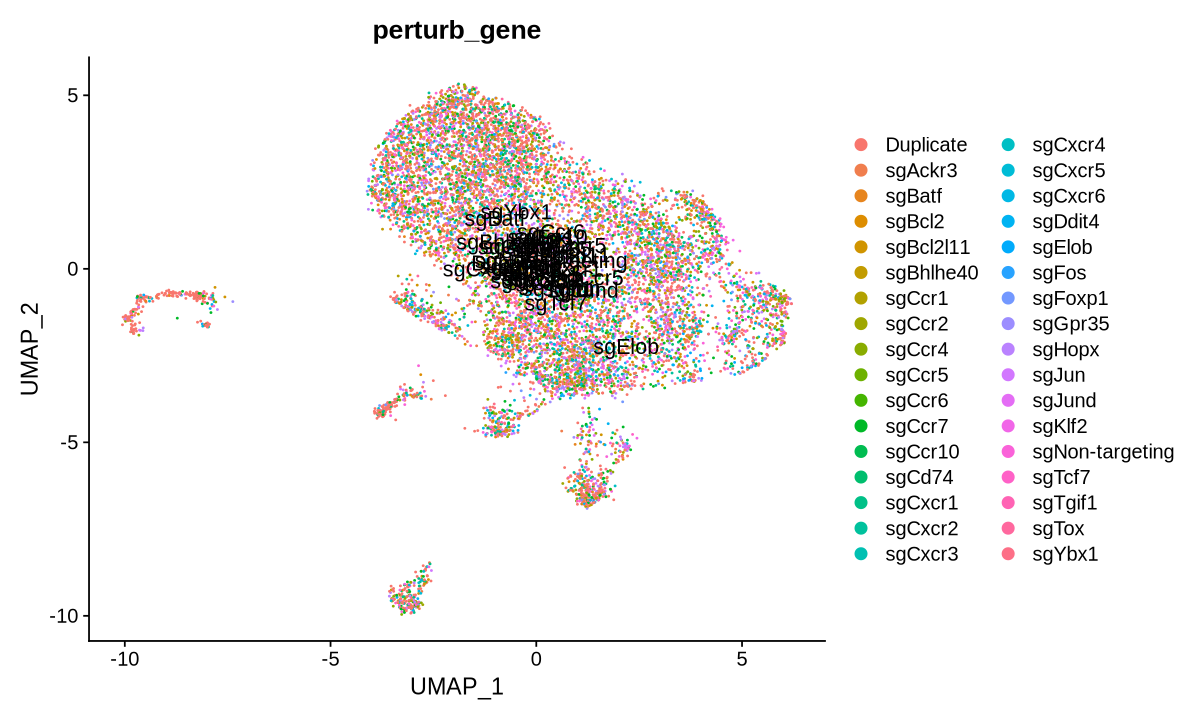

In [107]:
DimPlot(t_high_data, label=T, group.by="perturb_gene", label.size = 4.5)

In [59]:
fdata <- read_h5ad("/home/wpy/stereoseq/20240702-Exclusive/RNA/spatial.combined.clustered.h5")
spatial_data <- CreateSeuratObject(counts=t(fdata$X), meta.data=fdata$obs)
print(str(spatial_data))

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:26942885] 92 100 144 184 194 207 217 223 235 237 ...
  .. .. .. .. .. ..@ p       : int [1:11613] 0 1634 2013 3978 8235 10852 14756 19317 21409 23038 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 13800 11612
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:13800] "A1cf" "A26c2" "A2m" "A3galt2" ...
  .. .. .. .. .. .. ..$ : chr [1:11612] "4980" "7470" "11351" "10460" ...
  .. .. .. .. .. ..@ x       : num [1:26942885] 1.11 1.11 1.11 1.11 1.11 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:26942885] 92 100 144 184 194 207 217 223 235 237 ...
  .. .. .. .. .. ..@ p    

In [60]:
spatial_data@meta.data$coord_x <- fdata$obsm$spatial[, 1]
spatial_data@meta.data$coord_y <- fdata$obsm$spatial[, 2]

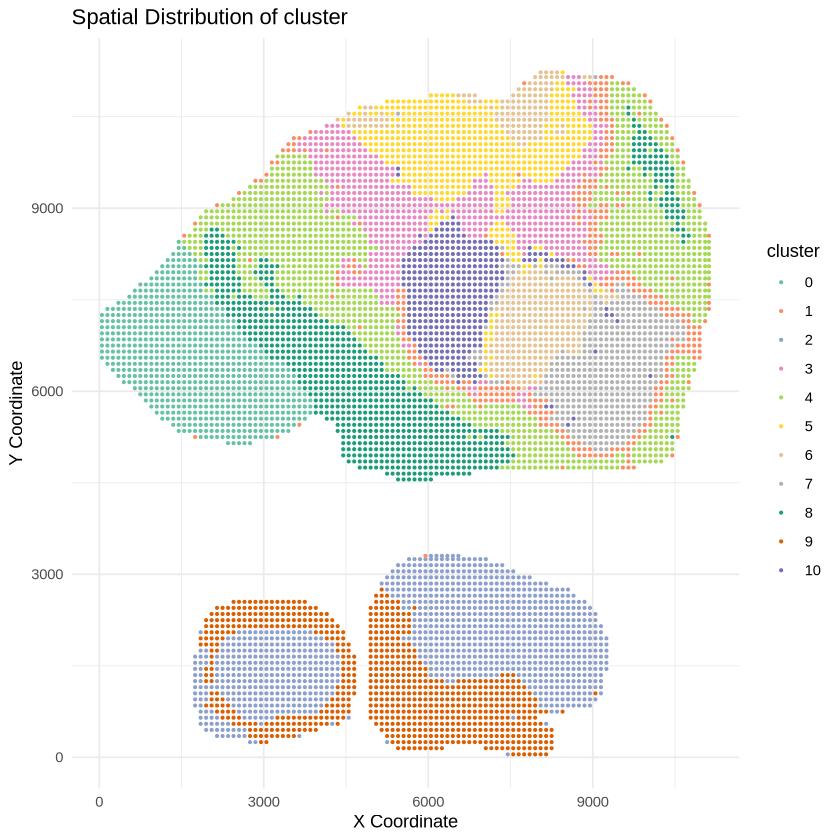

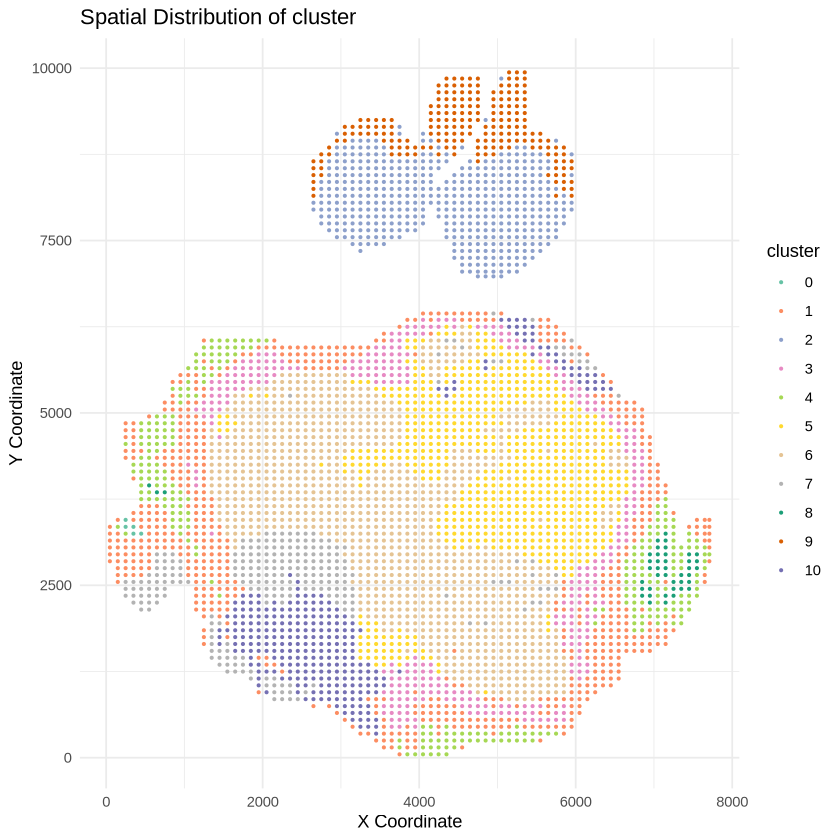

In [15]:
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

SpatialDimPlotCustom <- function(object, attribute, marker_value) {
  filtered_data <- subset(object, subset=marker==marker_value)
  ggplot(filtered_data@meta.data, aes(x = coord_x, y = coord_y, color = .data[[attribute]])) +
    geom_point(size=0.5) +
    labs(title = paste("Spatial Distribution of", attribute),
         x = "X Coordinate",
         y = "Y Coordinate",
         color = attribute) +
    theme_minimal()+
    scale_color_manual(values=custom_colors)
}

SpatialDimPlotCustom(spatial_data, "cluster", "A")
SpatialDimPlotCustom(spatial_data, "cluster", "B")

In [61]:
spatial_data@images$Spatial <- new(
    Class="VisiumV1",
    assay="RNA",
    key="image_",
    coordinates=data.frame(
        imagerow = spatial_data@meta.data$coord_x,
        imagecol = spatial_data@meta.data$coord_y
    )%>%magrittr::set_rownames(rownames(spatial_data@meta.data)),
    #cells=spatial_data@assays$RNA@cells@dimnames[1],
    scale.factors=scalefactors(spot = 138.656, fiducial = 223.9828, hires = 0.1139861, lowres = 0.03419583)
)

In [108]:
spatial_data <- RenameCells(spatial_data, new.names = make.names(Cells(spatial_data)))
t_high_data <- RenameCells(t_high_data, new.names=make.names(Cells(t_high_data)))

In [65]:
genes_of_interest = c('Cd8a', 'Cd8b1', 'Cd3e', 'Cd3d', 'Cd3g')
spatial_data[["total_expression"]] <- colSums(spatial_data@assays$RNA@data[genes_of_interest, ])
tdata <- subset(spatial_data, subset = total_expression > 0)

In [109]:
t_high_data@meta.data$type <- 'T'

In [66]:
a_data <- subset(tdata, subset = (marker == 'A') & (coord_y > 4000))
b_data <- subset(tdata, subset = (marker == 'B') & (coord_y < 6500))

In [110]:
a_traint <- CellTrek::traint(st_data = a_data, sc_data = t_high_data, sc_assay = "RNA", st_assay = "RNA", cell_names = 'type', nfeatures = 2000)

Finding transfer anchors... 


No variable features found for object1 in the object.list. Running FindVariableFeatures ...



Using 112 features for integration... 


Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12162 anchors

Filtering anchors

	Retained 5239 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 112 features onto reference data



Creating new Seurat object... 


Warning message:
“Layer counts isn't present in the assay object; returning NULL”


Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

PC_ 1 
Positive:  Cd63, Vcam1, Aqp3, Myadm, Ifitm2, Areg, Ifitm1, Col6a2, Anxa1, Rhoc 
	   Pmepa1, Csf1, S100a6, Bst2, Klf2, Itgb7, Fcgr4, Cd300a, Lrig1, Cxcl13 
	   Tnfsf9, Adrb2, Itga1, Emb, H2-Aa, H2-Ab1, Sirpb1a, S1pr1, Adgrv1, Fcer1g 
Negative:  Nkg7, Cd52, Ltb, Hcst, Klrd1, Cd8a, Cd8b1, Klrc1, Pdcd1, Lag3 
	   Tigit, Tnfrsf18, Il21r, Prkch, Itgb1, Cxcr6, Ctla4, Tnfrsf9, Prf1, Tox 
	   Havcr2, Cd160, Ccr7, Rgs1, Rgs2, Eomes, Itga4, Il12rb2, Tnfsf4, Tnfrsf4 
PC_ 2 
Positive:  Cxcr3, Gzmk, Gzma, Hcst, Ifngr1, Cd52, Itgb7, S1pr1, Nkg7, Itgb1 
	   Gpr183, Ccr2, Pag1, Rgs1, Cxcr6, Ltb, Cd226, Klrd1, Il7r, Emb 
	   Itga1, S100a6, Anxa1, Klrc1, Klf2, Cxcr4, Cd69, Klrg1, Mctp2, Ctla4 
Negative:  Tnfrsf4, Tnfrsf9, Ccr7, Cd70, Cd8a, Cd74, Tnfsf4, Lag3, Il21r, Vamp5 
	   Il1r2, Crtam, Cd63, Eomes, Tnfsf9, Vcam1, Rhoc, Il2ra, H2-Ab1, Cd160 
	   Prf1, Tox, Pdcd1, H2-Aa, Tnfrsf18, Gpm6b, Areg, Pnpla2, Havcr2, Mpp7 
PC_ 3 
Positive:  Gzme, Tox, Havcr2, Pdcd1, I

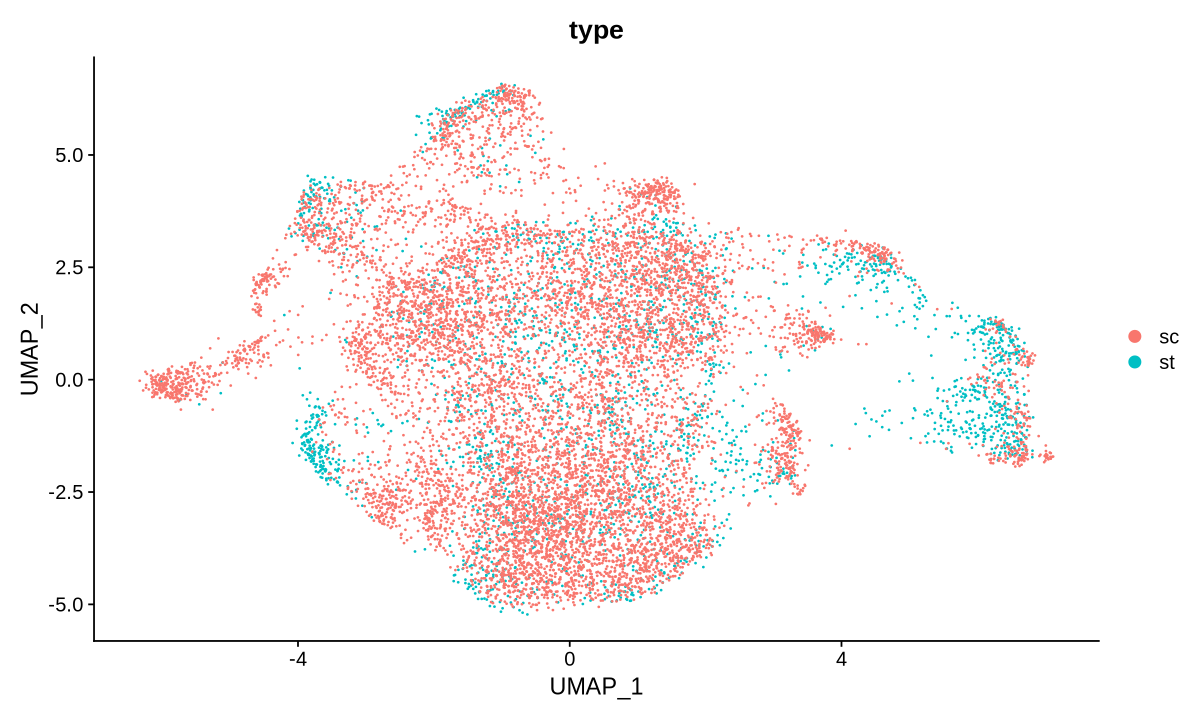

In [111]:
DimPlot(a_traint, group.by='type', raster=F)

In [112]:
b_traint <- CellTrek::traint(st_data = b_data, sc_data = t_high_data, sc_assay = "RNA", st_assay = "RNA", cell_names = 'type', nfeatures = 2000)

Finding transfer anchors... 


No variable features found for object1 in the object.list. Running FindVariableFeatures ...



Using 117 features for integration... 


Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12449 anchors

Filtering anchors

	Retained 5861 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 117 features onto reference data



Creating new Seurat object... 


Warning message:
“Layer counts isn't present in the assay object; returning NULL”


Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

PC_ 1 
Positive:  Cd63, Vcam1, Myadm, Aqp3, Ifitm2, Areg, Ifitm1, Col6a2, Rhoc, Anxa1 
	   Pmepa1, Csf1, Fcgr4, Lrig1, Bst2, Itm2c, Cd300a, Klf2, S100a6, Slc38a2 
	   Itgb7, Tnfsf9, Sirpb1a, H2-Aa, Itga1, H2-Ab1, Slc16a7, Adrb2, Plp2, Emb 
Negative:  Nkg7, Cd52, Lcp1, Ltb, Hcst, Klrd1, Klrc1, Cd8b1, Cd8a, Pdcd1 
	   Lag3, Tnfrsf18, Il21r, Prkch, Itgb1, Cxcr6, Ctla4, Cd48, Tnfrsf9, Prf1 
	   Havcr2, Cd160, Tox, Cd5, Rgs1, Ccr7, Eomes, Rgs2, Il12rb2, Ccr2 
PC_ 2 
Positive:  Tnfrsf4, Tnfrsf9, Ccr7, Cd70, Cd8a, Cd74, Tnfsf4, Lag3, Il21r, Crtam 
	   Il1r2, Ptger2, Eomes, Tnfsf9, Il2ra, Cd63, Tox, Rhoc, Cd160, Prf1 
	   H2-Ab1, Vcam1, Pdcd1, Tnfrsf18, Gpm6b, H2-Aa, Havcr2, Mpp7, Cd5, Gzme 
Negative:  Cxcr3, Gzmk, Gzma, Hcst, Ifngr1, Itgb7, Cd52, S1pr1, Gpr183, Itgb1 
	   Nkg7, Pag1, Ccr2, Rgs1, Cxcr6, Ltb, Cd226, Il7r, Emb, Klrd1 
	   S100a6, Anxa1, Itga1, Klf2, Cxcr4, Klrc1, Cd69, Klrg1, Cd48, Mctp2 
PC_ 3 
Positive:  Crtam, Tnfsf8, Il2ra, Lta, Tnfsf14, Cd

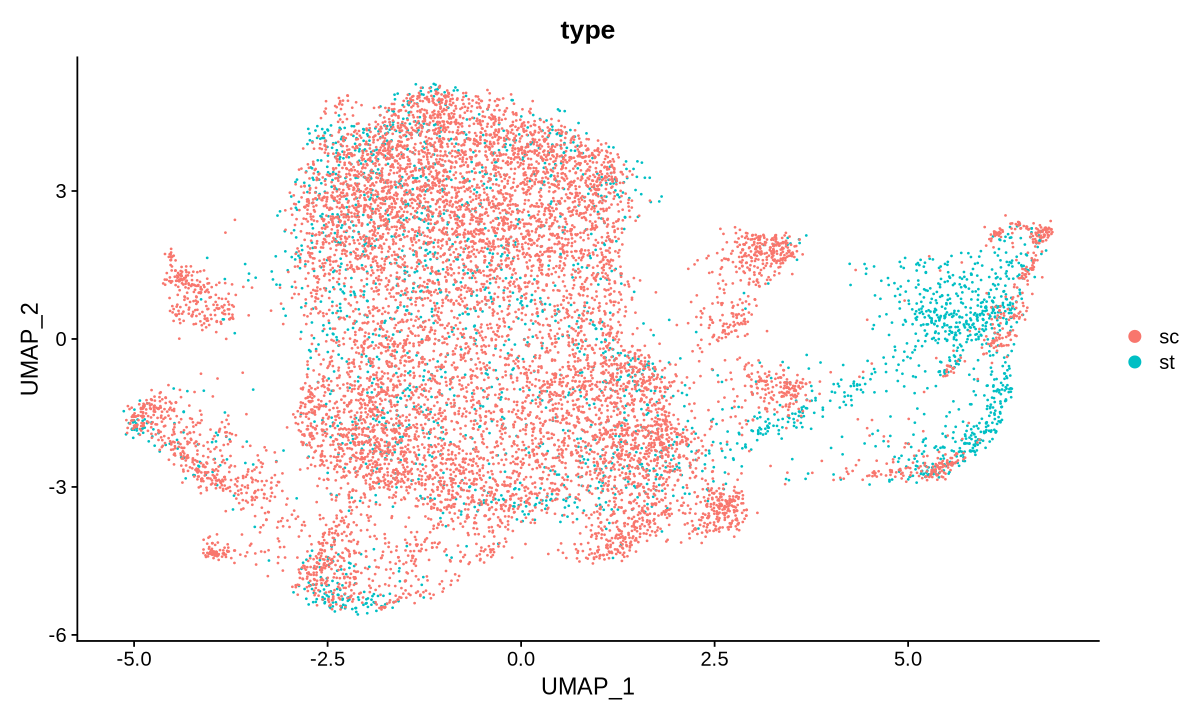

In [113]:
DimPlot(b_traint, group.by='type', raster=F)

In [114]:
a_celltrek <- CellTrek::celltrek(st_sc_int=a_traint, int_assay='traint', sc_data=t_high_data, sc_assay = 'RNA',
                                intp_pnt=500, intp_lin=F, nPCs=10, ntree=200, 
                                dist_thresh=0.55, top_spot=4, spot_n=10,
                                reduction='pca', intp=T, repel_r=20, repel_iter=20, keep_model=T)$celltrek

Distance between spots is: 141 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca to pca_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap to umap_”


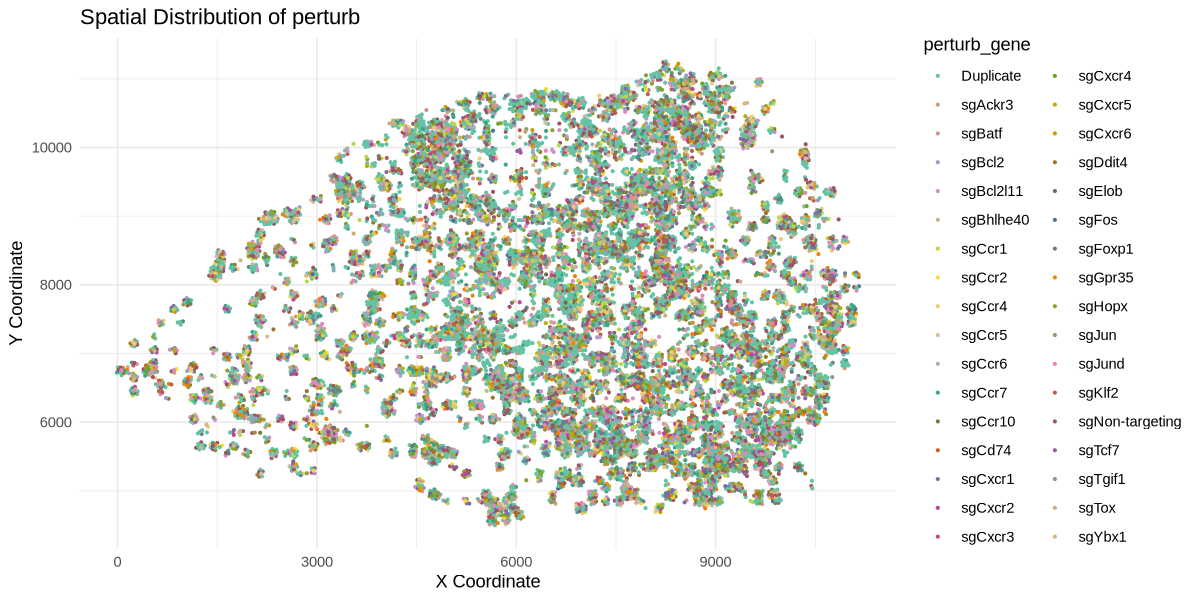

In [115]:
# 您提供的25种颜色
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

# 使用colorRampPalette函数生成35种颜色
generate_colors <- colorRampPalette(custom_colors)(35)
  
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(a_celltrek@meta.data, aes(x = coord_x, y = coord_y, color = .data[['perturb_gene']])) +
geom_point(size=0.5) +
labs(title = paste("Spatial Distribution of perturb"),
      x = "X Coordinate",
      y = "Y Coordinate",
      color = 'perturb_gene') +
theme_minimal()+
scale_color_manual(values=generate_colors)

In [116]:
b_celltrek <- CellTrek::celltrek(st_sc_int=b_traint, int_assay='traint', sc_data=t_high_data, sc_assay = 'RNA',
                                intp_pnt=500, intp_lin=F, nPCs=10, ntree=200, 
                                dist_thresh=0.55, top_spot=4, spot_n=10,
                                reduction='pca', intp=T, repel_r=20, repel_iter=20, keep_model=T)$celltrek

Distance between spots is: 101 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca to pca_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap to umap_”


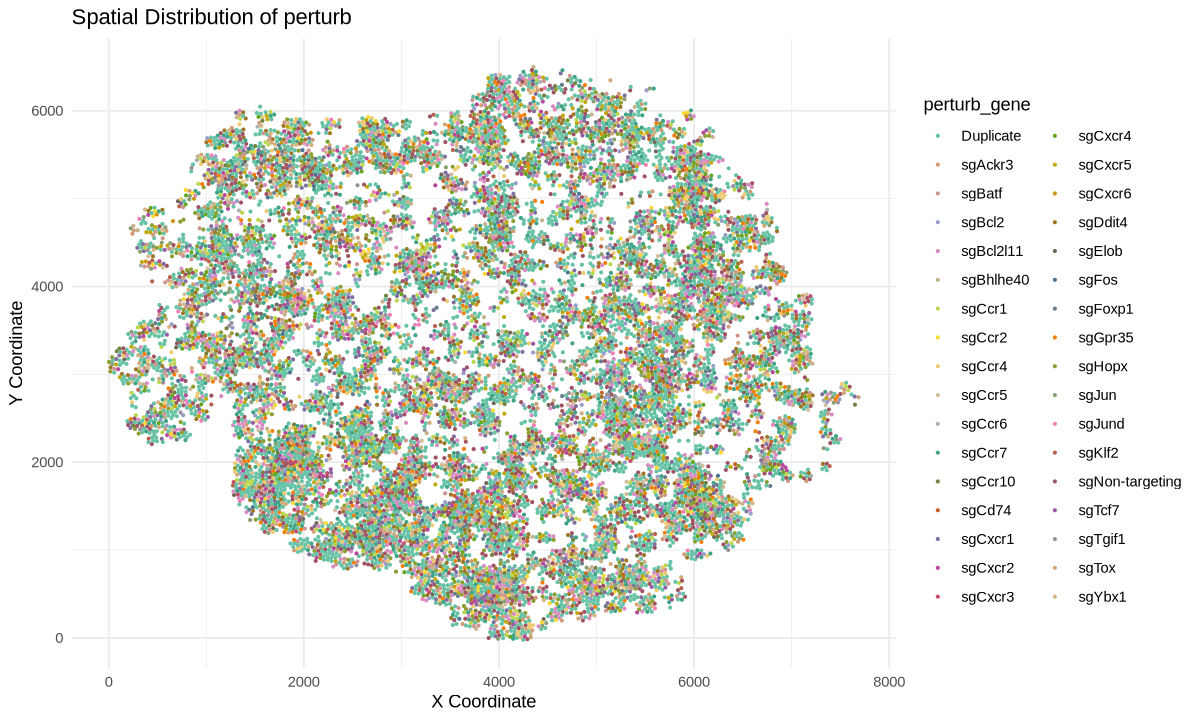

In [117]:
# 您提供的25种颜色
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

# 使用colorRampPalette函数生成35种颜色
generate_colors <- colorRampPalette(custom_colors)(35)
  
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(b_celltrek@meta.data, aes(x = coord_x, y = coord_y, color = .data[['perturb_gene']])) +
geom_point(size=0.5) +
labs(title = paste("Spatial Distribution of perturb"),
      x = "X Coordinate",
      y = "Y Coordinate",
      color = 'perturb_gene') +
theme_minimal()+
scale_color_manual(values=generate_colors)

In [121]:
degs <- union(degs, VariableFeatures(cdata))
perturb_data <- subset(cdata, features = degs, subset = perturb_gene != 'Duplicate')

In [142]:
a_celltrek <- RenameCells(a_celltrek, new.names = make.names(Cells(a_celltrek)) %>% paste('st_', ., sep=''))
perturb_data <- RenameCells(perturb_data, new.names = make.names(Cells(perturb_data)))

In [143]:
a_second_traint <- CellTrek::traint(st_data = a_celltrek, sc_data = perturb_data, sc_assay = "RNA", st_assay = "RNA", cell_names = 'group', nfeatures = 2000)

Finding transfer anchors... 


No variable features found for object1 in the object.list. Running FindVariableFeatures ...

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”


Using 112 features for integration... 


Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 26052 anchors

Filtering anchors

	Retained 19679 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 112 features onto reference data



Creating new Seurat object... 


Warning message:
“Layer counts isn't present in the assay object; returning NULL”


Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

PC_ 1 
Positive:  Cd63, Vcam1, H2-Ab1, Cd74, H2-Aa, Fcgr4, Cd300a, Ifitm2, Sirpb1a, Rhoc 
	   Fcer1g, H2-M2, Myadm, Areg, Aqp3, Col6a2, Il1r2, Slc2a1, Tnfrsf4, Cd70 
	   H2-Eb2, Tnfsf9, Ccr7, Anxa1, Lrig1, Tnfsf4, Csf1, Ifitm1, Tnfrsf9, Crtam 
Negative:  Nkg7, Cd52, Hcst, Ltb, Klrd1, Klrc1, Ifngr1, Cxcr6, Itgb1, Cxcr3 
	   Gzmk, Ccr2, Ctla4, Tigit, Rgs1, Gzma, Prkch, Cd8b1, Itgb7, Il7r 
	   Cd69, Gpr183, Itm2b, Pdcd1, Il12rb2, Cd226, S1pr1, Emb, S100a6, Pag1 
PC_ 2 
Positive:  Tnfrsf9, Cd8a, Tnfrsf4, Lag3, Il21r, Ccr7, Cd70, Crtam, Tnfsf4, Tnfrsf18 
	   Il10ra, Pdcd1, Cd160, Eomes, Il2ra, Cd6, Cd8b1, Prf1, Tox, Havcr2 
	   Tigit, Cd5, Nkg7, Il1r2, Gpm6b, Slc2a3, Tnfsf14, Tnfsf9, Prkch, Gzme 
Negative:  Anxa1, Itm2b, Itgb7, Cxcr3, Gzmk, Gzma, S100a6, Ifngr1, Myadm, Cd63 
	   S1pr1, Klf2, Vcam1, Ifitm2, Ifitm1, Emb, Gpr183, Pag1, Bst2, Aqp3 
	   Hcst, Cxcr4, Itga1, Rgs1, Il7r, Ccr2, Cd226, Pmepa1, Fcgr4, Col6a2 
PC_ 3 
Positive:  Aqp3, Rhoc, Areg, Cd63,

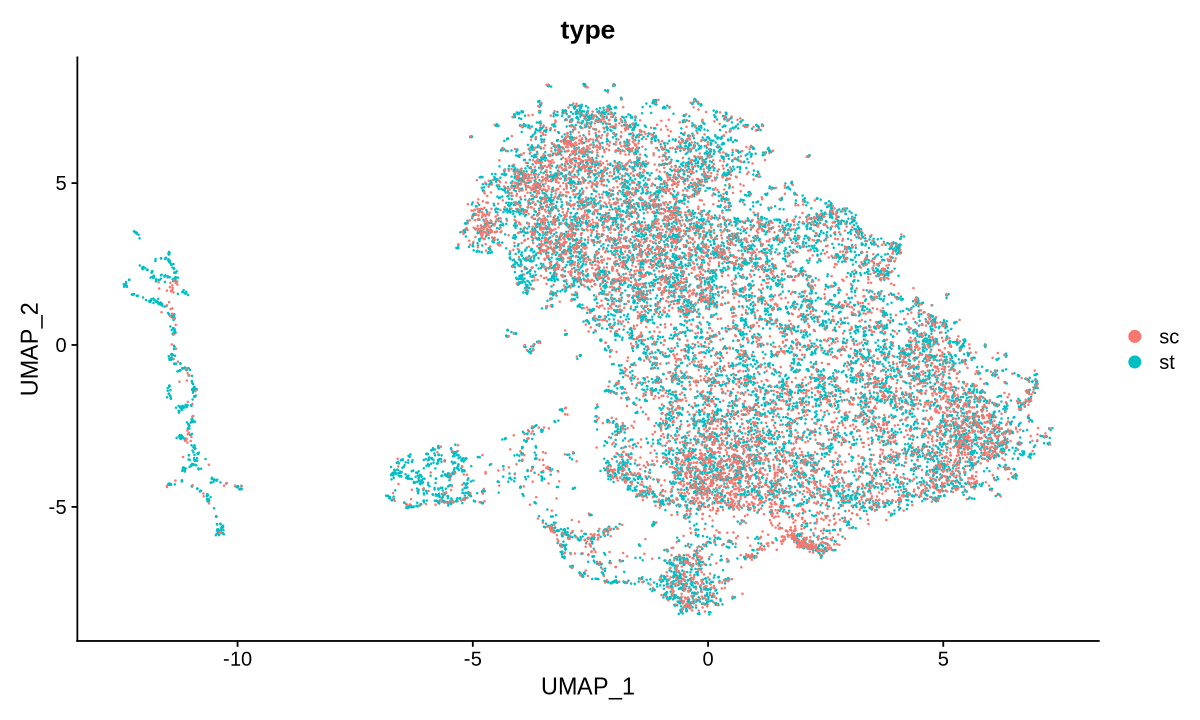

In [144]:
DimPlot(a_second_traint, group.by='type', raster=F)

In [152]:
a_second_celltrek <- CellTrek::celltrek(st_sc_int=a_second_traint, int_assay='traint', sc_data=perturb_data, sc_assay = 'RNA',
                                intp_pnt=500, intp_lin=F, nPCs=10, ntree=200,
                                dist_thresh=0.55, top_spot=4, spot_n=1,
                                reduction='pca', intp=T, repel_r=20, repel_iter=20, keep_model=T)$celltrek

Distance between spots is: 46 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”


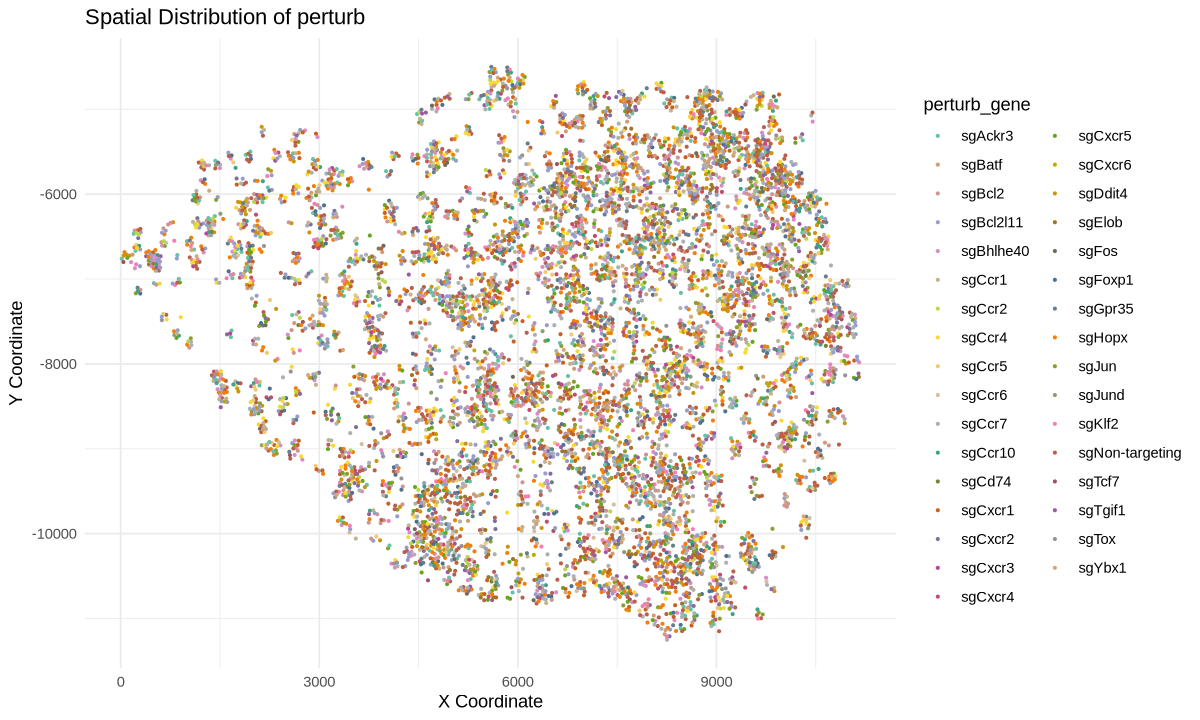

In [157]:
# 您提供的25种颜色
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

# 使用colorRampPalette函数生成35种颜色
generate_colors <- colorRampPalette(custom_colors)(35)
  
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot((a_second_celltrek)@meta.data, aes(x = coord_x, y = -coord_y, color = .data[['perturb_gene']])) +
geom_point(size=0.5) +
labs(title = paste("Spatial Distribution of perturb"),
      x = "X Coordinate",
      y = "Y Coordinate",
      color = 'perturb_gene') +
theme_minimal()+
scale_color_manual(values=generate_colors)

In [159]:
b_celltrek <- RenameCells(b_celltrek, new.names = make.names(Cells(b_celltrek)) %>% paste('st_', ., sep=''))
perturb_data <- RenameCells(perturb_data, new.names = make.names(Cells(perturb_data)))

In [160]:
b_second_traint <- CellTrek::traint(st_data = b_celltrek, sc_data = perturb_data, sc_assay = "RNA", st_assay = "RNA", cell_names = 'group', nfeatures = 2000)

Finding transfer anchors... 


No variable features found for object1 in the object.list. Running FindVariableFeatures ...

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”


Using 112 features for integration... 


Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 26528 anchors

Filtering anchors

	Retained 19996 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 112 features onto reference data



Creating new Seurat object... 


Warning message:
“Layer counts isn't present in the assay object; returning NULL”


Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

PC_ 1 
Positive:  Cxcr3, Gzmk, Ifngr1, Hcst, Gzma, Itm2b, Itgb7, S100a6, Cd52, S1pr1 
	   Anxa1, Gpr183, Ccr2, Itgb1, Rgs1, Cxcr6, Il7r, Emb, Klf2, Pag1 
	   Cd226, Klrd1, Klrc1, Itga1, Cd69, Ltb, Ifitm1, Cxcr4, Bst2, Cd40lg 
Negative:  Tnfrsf9, Tnfrsf4, Ccr7, Cd8a, Il21r, Cd70, Lag3, Crtam, Tnfsf4, Cd74 
	   Eomes, Il1r2, Il10ra, Tnfrsf18, Il2ra, Tox, Cd160, Cd6, Prf1, Tnfsf9 
	   Cd5, Pdcd1, Gpm6b, Havcr2, H2-Ab1, Cd8b1, Tnfsf14, Mpp7, H2-Aa, Gzme 
PC_ 2 
Positive:  Cd63, Vcam1, H2-Aa, Ifitm2, H2-Ab1, Fcgr4, Cd300a, Sirpb1a, Myadm, Fcer1g 
	   Cd74, Aqp3, Rhoc, H2-M2, Areg, Anxa1, Col6a2, H2-Eb2, Ifitm1, Slc2a1 
	   Bst2, Pmepa1, Il1r2, Cxcr4, Lrig1, Klf2, Csf1, S100a6, Adrb2, Pag1 
Negative:  Nkg7, Cd52, Ltb, Klrd1, Klrc1, Hcst, Tigit, Cd8b1, Cd8a, Lag3 
	   Pdcd1, Cxcr6, Prkch, Tnfrsf18, Ctla4, Il21r, Tnfrsf9, Itgb1, Havcr2, Cd160 
	   Ifngr1, Cd6, Cd5, Il10ra, Tox, Il12rb2, Prf1, Il2ra, Slc2a3, Ccr2 
PC_ 3 
Positive:  Aqp3, Rhoc, Cd63, Areg, Anxa

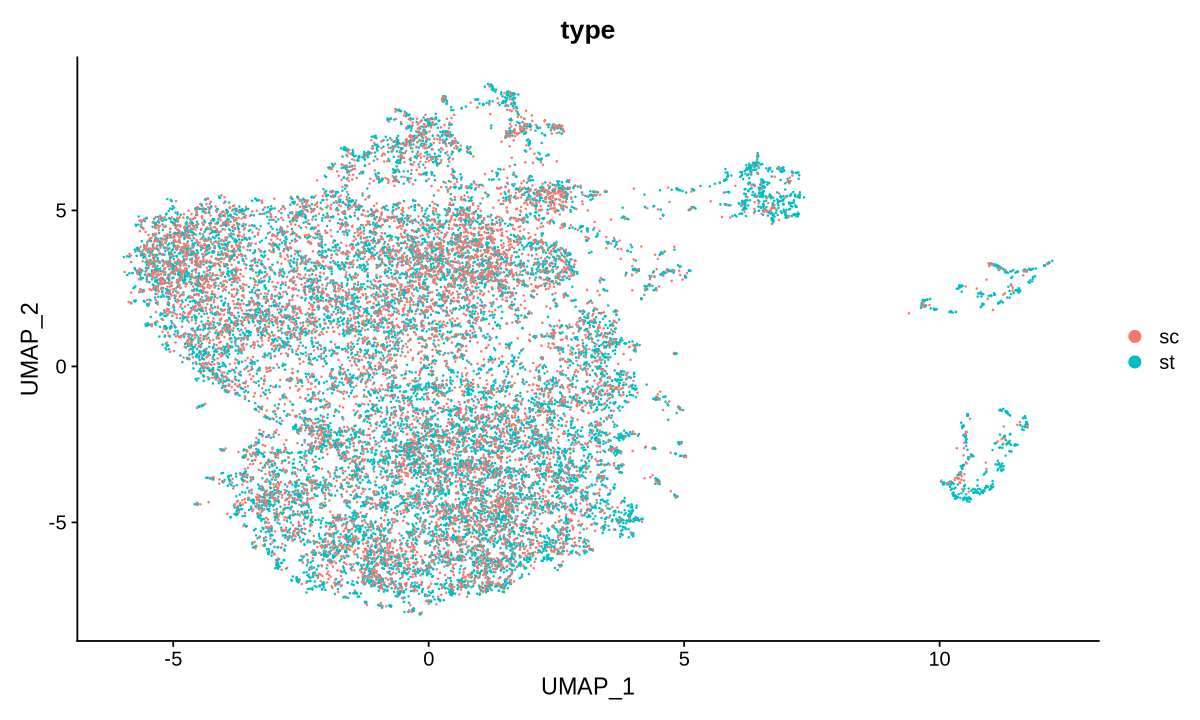

In [161]:
DimPlot(b_second_traint, group.by='type', raster=F)

In [162]:
b_second_celltrek <- CellTrek::celltrek(st_sc_int=b_second_traint, int_assay='traint', sc_data=perturb_data, sc_assay = 'RNA',
                                intp_pnt=500, intp_lin=F, nPCs=10, ntree=200,
                                dist_thresh=0.55, top_spot=4, spot_n=1,
                                reduction='pca', intp=T, repel_r=20, repel_iter=20, keep_model=T)$celltrek

Distance between spots is: 42 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Layer counts isn't present in the assay object; returning NULL”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”


In [167]:
a_second_celltrek

An object of class Seurat 
2029 features across 7409 samples within 1 assay 
Active assay: RNA (2029 features, 0 variable features)
 1 layer present: data
 2 dimensional reductions calculated: celltrek, celltrek_raw
 1 image present: Spatial

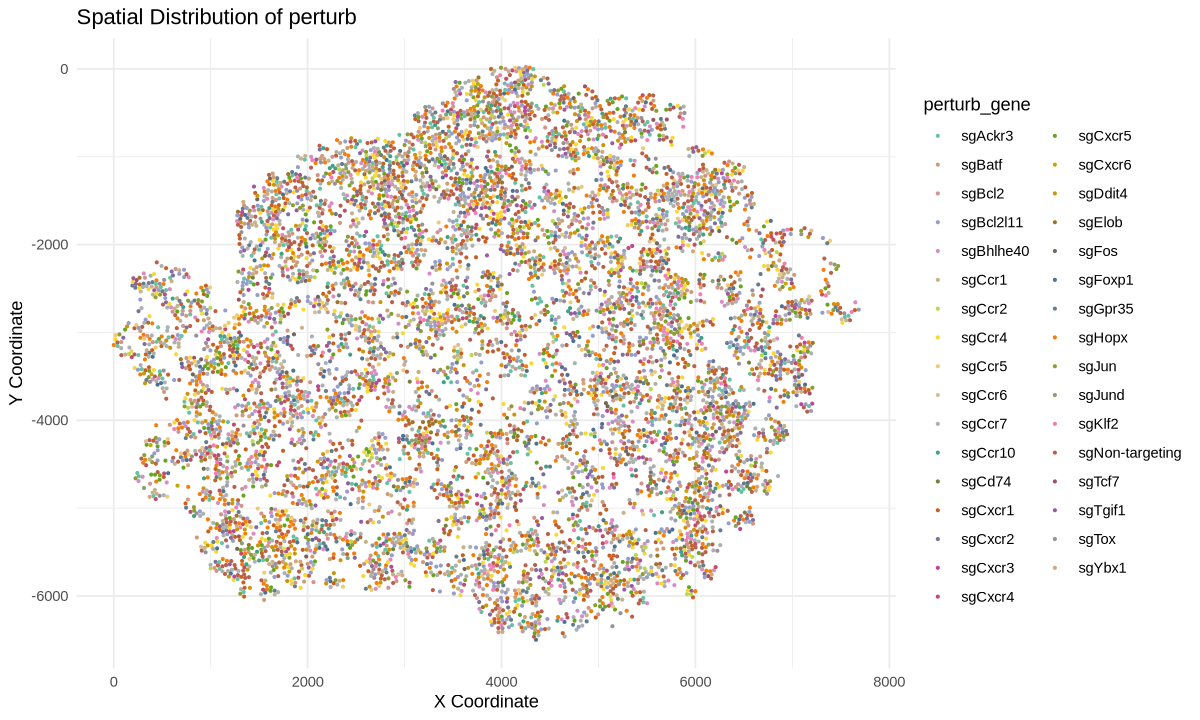

In [163]:
# 您提供的25种颜色
custom_colors <- c(
  "#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854",
  "#ffd92f", "#e5c494", "#b3b3b3", "#1b9e77", "#d95f02",
  "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d",
  "#666666", "#377eb8", "#ff7f00", "#4daf4a", "#f781bf",
  "#a65628", "#984ea3", "#999999", "#fdb462", "#80b1d3"
)

# 使用colorRampPalette函数生成35种颜色
generate_colors <- colorRampPalette(custom_colors)(35)
  
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot((b_second_celltrek)@meta.data, aes(x = coord_x, y = -coord_y, color = .data[['perturb_gene']])) +
geom_point(size=0.5) +
labs(title = paste("Spatial Distribution of perturb"),
      x = "X Coordinate",
      y = "Y Coordinate",
      color = 'perturb_gene') +
theme_minimal()+
scale_color_manual(values=generate_colors)

In [169]:
c_tab <- a_second_celltrek@meta.data %>% dplyr::select(c('coord_x', 'coord_y', 'perturb', 'perturb_gene'))
write.table(c_tab, '/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.double.t_map.A.csv', sep='\t', quote=FALSE)

c_tab <- b_second_celltrek@meta.data %>% dplyr::select(c('coord_x', 'coord_y', 'perturb', 'perturb_gene'))
write.table(c_tab, '/home/wpy/stereoseq/20240702-Exclusive/RNA/sc.double.t_map.B.csv', sep='\t', quote=FALSE)